In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras

In [24]:
from tensorflow.keras.layers import Dense

In [25]:
pic = pd.read_csv('/content/mnist2.csv')
pic.head(2)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
pic['5'].value_counts()

1    227
3    207
9    196
6    192
2    191
7    191
4    185
8    184
0    181
5    174
Name: 5, dtype: int64

In [27]:
predictors = pic.drop('5', axis=1)

In [28]:
predictors= np.array(predictors, np.float32)

In [29]:
target= pic['5']

also ich mach eis bispiel für das ganze Gradient zügs berechne und d Gwicht update. 

In [54]:
input = np.array([2,6])

In [55]:
weights= np.array([3,2])

In [56]:
target= np.array([15])

In [57]:
node1 = (input*weights).sum()
node1

18

In [58]:
gradient= input*2*(node1-target)

In [59]:
error1 = target-node1
error1

array([-3])

In [61]:
weights_updated= weights-0.01*gradient
weights_updated

array([2.88, 1.64])

In [62]:
node1_1= (input * weights_updated).sum()

In [64]:
error2= node1_1-target
error2

array([0.6])

In [66]:
bilder = pd.read_csv('/content/mnist2.csv')
bilder.head(2)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
target= to_categorical(bilder['5'])

In [75]:
from tensorflow.keras.utils import to_categorical

In [80]:
predictors = bilder.drop('5', axis=1)
predictors = np.array(predictors, np.float32)

In [70]:
from keras.models import Sequential

In [215]:
model = Sequential()

In [216]:
from keras.layers import Dense

In [217]:
model.add(Dense(1000, activation='relu', input_shape=(784,)))

In [218]:
model.add(Dense(10, activation='softmax'))

In [219]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [220]:
from keras.callbacks import EarlyStopping

In [221]:
stopper = EarlyStopping(patience=3)

In [222]:
model.fit(predictors, target, validation_split=0.3, epochs=10, callbacks=[stopper])

Epoch 1/10
43/43 [==============================] - 1s 15ms/step - loss: 40.0216 - accuracy: 0.6775 - val_loss: nan - val_accuracy: 0.8377
Epoch 2/10
43/43 [==============================] - 0s 11ms/step - loss: 6.3301 - accuracy: 0.9118 - val_loss: nan - val_accuracy: 0.8377
Epoch 3/10
43/43 [==============================] - 1s 12ms/step - loss: 2.5331 - accuracy: 0.9385 - val_loss: nan - val_accuracy: 0.8808


In [65]:
from tensorflow.keras.models import load_model

In [205]:
model.save('/igewas.h5')

In [206]:
model2 = load_model('igewas.h5')

In [208]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 500)               392500    
                                                                 
 dense_38 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


In [225]:
model2.predict(predictors[:5])[1]

1/1 [==============================] - 0s 22ms/step


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.6102428e-34, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [227]:
wages = pd.read_csv('/content/hourly_wages.csv')
wages.head(3)

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0


In [228]:
wages.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
target2 = wages['wage_per_hour']

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
scaler= StandardScaler()

In [238]:
predictors2 = scaler.fit_transform(np.array(wages.drop('wage_per_hour', axis=1), np.float32))

In [234]:
n_cols = predictors.shape[1]

In [321]:
def  get_model():
  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(1, activation='relu'))
  return model

In [237]:
from keras.optimizers import SGD

In [243]:
from tensorflow.keras.callbacks import EarlyStopping

In [244]:
stopper  = EarlyStopping(patience=2)

In [245]:
learning_rates= [0.0001,0.001,0.01,0.1,1,10]

In [267]:
res = {}

In [310]:
for lr in learning_rates:
  model = get_model()
  optimizer = SGD(lr=lr)
  model.compile(optimizer=optimizer, loss='MAE')
  res1 = model.fit(predictors2, target2, epochs=10, callbacks=[stopper], validation_split=0.25, verbose=False)
  res[lr] = res1.history['val_loss'][-1]

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [273]:
res

{0.0001: 10.868592262268066,
 0.001: 10.653250694274902,
 0.01: 4.859172821044922,
 0.1: 3.9888646602630615,
 1: 5.006801605224609,
 10: 10.975671768188477}

In [287]:
res2 = {}

In [322]:
for lr in learning_rates:
  model = get_model()
  optimizer= SGD(lr=lr)
  model.compile(optimizer=optimizer, loss='MSE')
  training = model.fit(predictors2, target2, validation_split=0.25, epochs=15, callbacks=[stopper], verbose=False)
  res2[lr] = training.history['val_loss']

In [323]:
for lr in learning_rates:
  print(lr, res2[lr][-1])


0.0001 117.23091888427734
0.001 33.952613830566406
0.01 29.079153060913086
0.1 30.081880569458008
1 151.86990356445312
10 151.86990356445312


In [291]:
import matplotlib.pyplot as plt

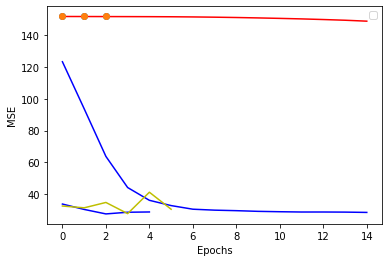

In [313]:
plt.plot(res2[0.0001], 'r')
plt.plot(res2[0.001], 'b')
plt.plot(res2[0.01], 'b')
plt.plot(res2[0.1], 'y')
plt.plot(res2[1], 'o')
plt.plot(res2[10], 'o')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()